In [1]:
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
data = load_boston()

In [3]:
y = data["target"]

In [4]:
data = pd.DataFrame(data = data["data"], columns=data["feature_names"])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
#reg = LinearRegression()
reg = Lasso()
# reg = SVR(kernel = "rbf", epsilon=0.16, degree=3)

In [17]:
ss = StandardScaler()

In [18]:
d = data.copy()
d = ss.fit_transform(d)

## Old Way

In [19]:
X_train, X_test, y_train, y_test = train_test_split(d, y, test_size = .3)


In [20]:
reg.fit(X_train, y_train)



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
e1 = MSE(y_train, reg.predict(X_train))
e2 = MSE(y_test, reg.predict(X_test))
print("Train MSE:\t %.4f \nTest MSE:\t %.4f" % (e1,e2))

Train MSE:	 27.1366 
Test MSE:	 28.5350


## New Way

In [22]:
kf = KFold(n_splits = 5, shuffle = True)
# http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [23]:
cross_val_score(reg, d, y, scoring="neg_mean_squared_error", cv = kf)
# http://scikit-learn.org/stable/modules/model_evaluation.html

array([-38.03157641, -28.7378805 , -22.54015065, -21.36626279, -34.88549976])

In [24]:
s = cross_val_score(reg, d, y, scoring="neg_mean_squared_error", cv = kf)
np.mean(s), np.std(s)

(-29.501309910446501, 8.7833054372170025)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [79]:
np.logspace(0, 1, 50, base = 2)

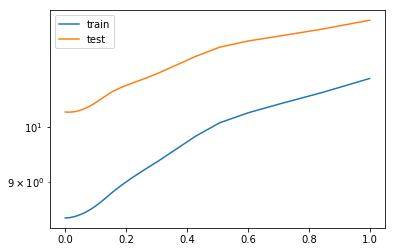

In [86]:

n = 50
alphas = np.logspace(-12, 0, n, base = 2)
train = np.zeros(n)
test = np.zeros(n)

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(d, y, test_size = .3)
    for i, alpha in enumerate(alphas):
        reg = Lasso(alpha=alpha)
        reg.fit(X_train, y_train)
        train[i] += MSE(y_train, reg.predict(X_train)) / n
        test[i] += MSE(y_test, reg.predict(X_test)) / n
    
plt.plot(alphas, train, label = "train")
plt.plot(alphas, test, label = "test")
plt.yscale("log", base = 2)
plt.legend();
